In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [4]:
df=pd.read_csv("https://github.com/campusx-official/100-days-of-machine-learning/raw/refs/heads/main/day38-missing-indicator/train.csv",usecols=["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [7]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [11]:
X=df.drop(columns="Survived")
y=df["Survived"]


## Train Test Split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train["Age_imputed"]=X_train["Age"]
X_test["Age_imputed"]=X_test["Age"]


In [ ]:
X_train["Age_imputed"][X_train["Age_imputed"].isnull()]=X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values

In [26]:
X_train.isnull().sum()

Age            140
Fare             0
Age_imputed      0
dtype: int64

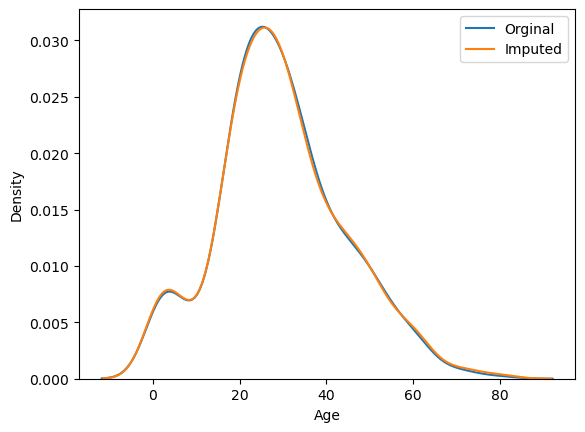

In [33]:
sns.kdeplot(X_train["Age"],label="Orginal")
sns.kdeplot(X_train["Age_imputed"],label="Imputed")
plt.legend()
plt.show()


In [34]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,58.606377
Age,71.580633,210.251707,210.251707
Age_imputed,58.606377,210.251707,218.889974


<Axes: >

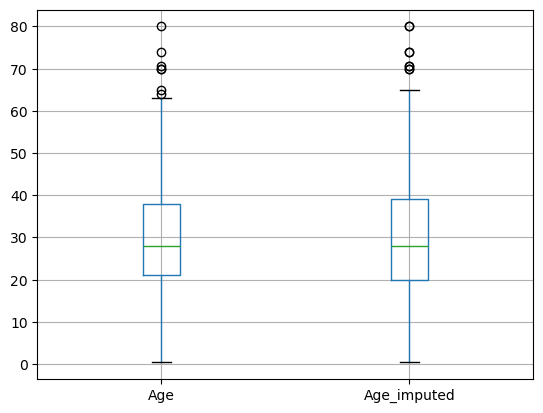

In [35]:
X_train[['Age', 'Age_imputed']].boxplot()